In [2]:
% load_ext autoreload
% autoreload 2

In [3]:
#! git clone https://github.com/stankevich-mipt/text_to_image_with_transformer.git

Cloning into 'text_to_image_with_transformer'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 94 (delta 41), reused 66 (delta 20), pack-reused 0
Unpacking objects: 100% (94/94), done.


In [1]:
! nvidia-smi

Sun Jun 13 23:09:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
#! pip install subword-nmt
#! pip install nltk
#! pip install torchtext
#! pip install einops

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#!pip install pydrive                             
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth                    
#from oauth2client.client import GoogleCredentials

#auth.authenticate_user()                         
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#your_module = drive.CreateFile({"id": "1-1zRjcpx_UBFGCWD62r5O9POl5krUYOo"})   
#your_module.GetContentFile("flowers_.hdf5")

In [6]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), 'text_to_image_with_transformer'))

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

from transformer.dataset import Text2ImageDataset

train_dataset = Text2ImageDataset(
    'flowers_.hdf5',
    max_text_length=64,
    split=0
)

In [22]:
from transformer.transformer import Transformer
from vqvae.vqvae import VQVAE

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
transformer = Transformer(
    train_dataset.image_tokens, train_dataset.text_tokens, 
    train_dataset.max_text_length, 258, device, num_layers=6
)

transformer.load_state_dict(
    torch.load('/content/drive/MyDrive/transformer_flowers/2021-06-10_12-17-31.pth')['model']
)

vqvae = VQVAE(device, 128, 64, 64)
vqvae.load_state_dict(
    torch.load('/content/drive/MyDrive/vqvae_flowers/2021-06-09_20-46-31.pth')['model']
)


<All keys matched successfully>

In [23]:
transformer = transformer.eval().to(device)
vqvae       = vqvae.eval().to(device)

In [83]:
from utils import generate_from_text

text = 'this flower has white petals with yellow stamen\n'

image = generate_from_text(text, train_dataset, transformer, vqvae, 0.1)

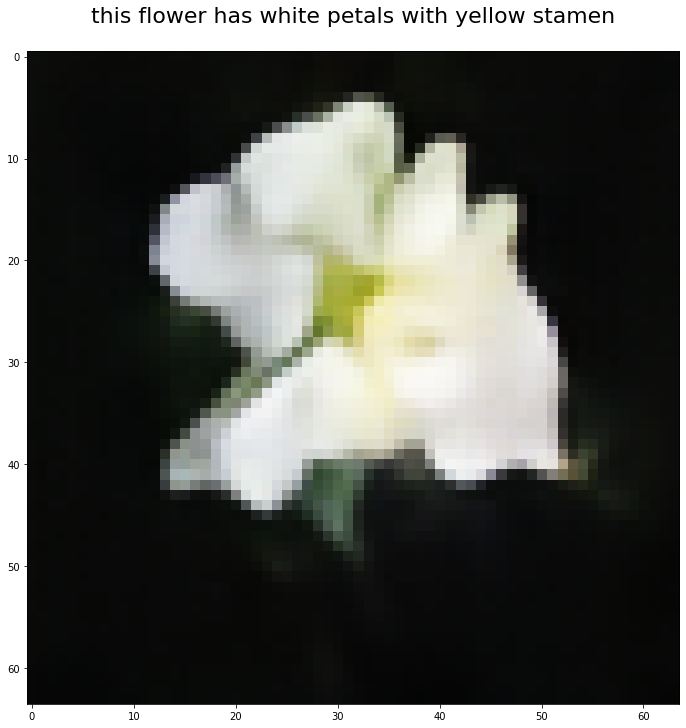

In [84]:
plt.figure(figsize=(12, 12))
plt.title(text, fontdict={'fontsize': 22})
plt.imshow(image)
plt.show()